# Excercise 1 - Solution - Identifying a superconductor sample

In [1]:
#First import the necessary libraries
import ROOT
import pandas as pd
import numpy as np

Welcome to JupyROOT 6.30/04


## Cleaning data

In [2]:
file = "warmingdata.txt"
vrows = [] #Valid rows (with 3 values)
with open(file,'r') as file:
    for lines in file:
        rows = lines.split() #Create a list where each row has a value as a string
        if len(rows) == 3:
            vrows.append(list(map(float, rows))) #Create a row which is a list with float elements
data = pd.DataFrame(vrows, columns=['Current','Voltage','Temperature'])
display(data)

,Current,Voltage,Temperature
0,1.000583,5.052302e-07,83.353296
1,1.000527,3.823206e-07,83.432066
2,1.000586,9.862932e-07,83.513228
3,1.000596,9.595965e-07,83.606945
4,1.000565,6.656858e-07,83.741711
...,...,...,...
320,1.000512,1.377246e-03,144.377174
321,1.000492,1.377535e-03,144.512303
322,1.000434,1.378797e-03,144.645051
323,1.000508,1.380333e-03,144.780610


In [3]:
#Lets group the columns in different arrays
temperature = data["Temperature"].values #K
voltage = data["Voltage"].values #V
current = data["Current"].values*(1e-1) #A
type(temperature)

numpy.ndarray

In [4]:
resistance=voltage/current
type(resistance)

numpy.ndarray

In [5]:
print("voltage:",voltage," \n current",current,"\n temperature:",temperature,"\n resistance",resistance)

voltage: [ 5.05230239e-07  3.82320582e-07  9.86293195e-07  9.59596502e-07
  6.65685845e-07 -3.98809807e-08  1.57880618e-07  5.10644199e-07
 -7.93560489e-07 -3.49886981e-07  5.74734890e-07  9.86272250e-07
  4.14368026e-07 -2.85855643e-07  3.76895654e-07  6.17476878e-07
  9.16805287e-07  2.41472972e-08  8.31336761e-07 -1.30802265e-07
  2.59374553e-07  6.22888024e-07  3.87681067e-07  2.64694451e-07
  7.22494670e-08 -3.81989167e-07 -1.62821890e-07  4.19779292e-07
  2.70152025e-07 -8.27011451e-08 -8.20332628e-07 -7.73204362e-08
 -1.23187095e-06  7.67111475e-07 -7.40126865e-07  9.37261494e-08
 -5.31681208e-07 -4.94250292e-07  2.59341066e-07 -8.31070351e-07
 -4.78276153e-07 -2.64388773e-07 -3.28577748e-07 -4.88922930e-07
  3.55611212e-07  2.05955454e-07 -2.46593596e-09 -7.73193100e-08
 -4.72870913e-07 -1.94890358e-07  4.99971740e-07 -8.09651466e-07
 -6.70581637e-07 -1.73590648e-07 -2.37749291e-07 -3.01752552e-07
 -1.57391872e-06 -6.75993306e-07 -3.33948949e-07 -2.80479465e-07
 -6.01140025e-07

## Preview of the data

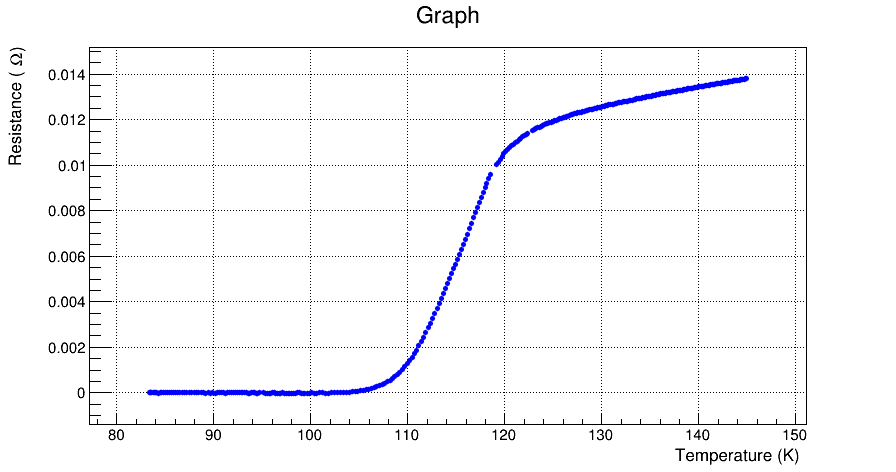

In [6]:
#Making a preview of the data
graph = ROOT.TGraph(len(data), temperature, resistance)

# Create a canvas for the graph
canvas = ROOT.TCanvas("canvas", "Gráfico sin errores", 900, 500)

# Graph style
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)
graph.SetMarkerColor(ROOT.kBlue)

# Configure axis
graph.GetXaxis().SetTitle("Temperature (K)")
graph.GetYaxis().SetTitle("Resistance (#Omega)")
graph.GetXaxis().SetTitleSize(0.04)
graph.GetYaxis().SetTitleSize(0.04)
canvas.SetGrid()

# Draw the graph in the canva
graph.Draw("AP")  # "AP" points and lines

# Show the canvas
canvas.Draw()

## Ploting and fitting

In [7]:
#As we can see there is a temperature window where the temperature remains constant:
#Lets define that window in the interval from 100 to 125 K
temperature_filtered = []
voltage_filtered = []
current_filtered = []
resistance_filtered = []
for temp, volt, curr, res in zip(temperature,voltage,current,resistance):
    if 100 <= temp <= 125:
        temperature_filtered.append(temp)
        voltage_filtered.append(volt)
        current_filtered.append(curr)
        resistance_filtered.append(res)

In [8]:
type(resistance_filtered)

list

In [9]:
temperature_filtered = np.array(temperature_filtered)
voltage_filtered = np.array(voltage_filtered)
current_filtered = np.array(current_filtered)
resistance_filtered = np.array(resistance_filtered)
type(resistance_filtered)

numpy.ndarray

In [10]:
#Finding the minimum and maximun values
min_temp = np.min(temperature_filtered)
max_temp = np.max(temperature_filtered)
min_voltage = np.min(voltage_filtered)
max_voltage = np.max(voltage_filtered)
min_current = np.min(current_filtered)
max_current = np.max(current_filtered)
min_resistance = np.min(resistance_filtered)
max_resistance = np.max(resistance_filtered)
print("T",min_temp,max_temp,"V",min_voltage,max_voltage,"A",min_current,max_current,"R",min_resistance,max_resistance)

T 100.083911 124.962156 V -1.51517576e-06 0.00119410162 A 0.10004401000000002 0.100064365 R -1.5144252865492506e-05 0.011934903261898288


In [11]:
# # # #Lets consider the accuracy of the Keithley 2000
# # # #For voltage \DeltaV = \pm (50ppm of reading + 35ppm of range)
# # #     #Computing the uncertainty
# voltage_error = 50*(10**(-6))*voltage_filtered + 5*(10**(-6))*(100*(10**(-3)))

# # # #For current \DeltaI = \pm (500ppm of reading + 800ppm of range)
# # #     #Computing the uncertainty
# current_error = (500*(10**(-6))*current_filtered + 800*(10**(-6))*(10**(-6)))

# # # #For temperature \DeltaT = \pm 0.5
# temperature_error= 0.5 * np.ones_like(temperature_filtered)

# resistance_error = resistance_filtered*np.sqrt((voltage_error/voltage_filtered)**2.0+(current_error/current_filtered)**2.0)
# print("voltage_error:",voltage_error,"\n current_error:",current_error,"\n resistance_error:",resistance_error)

In [12]:
#Lets consider the last count of the Keithley 2000
#For voltage 100.0000mV range the resolution is 0.1uV
     #Computing the uncertainty
voltage_error = (0.1e-6)*np.ones_like(voltage_filtered)

#For current 100.0000mA range the resolution is 100nA
      #Computing the uncertainty
current_error = (1e-6)*np.ones_like(current_filtered)

#For temperature -200 to +760 the resolution is 0.5
temperature_error= (0.5)*np.ones_like(temperature_filtered)

#Computing the error propagation for the resistance
resistance_error = resistance_filtered*np.sqrt(((voltage_error/voltage_filtered)**2) + ((current_error/current_filtered)**2))
print("voltage_error:",voltage_error,"\n current_error:",current_error,"\n resistance_error:",resistance_error)

voltage_error: [1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07
 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07] 
 current_error: [1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1

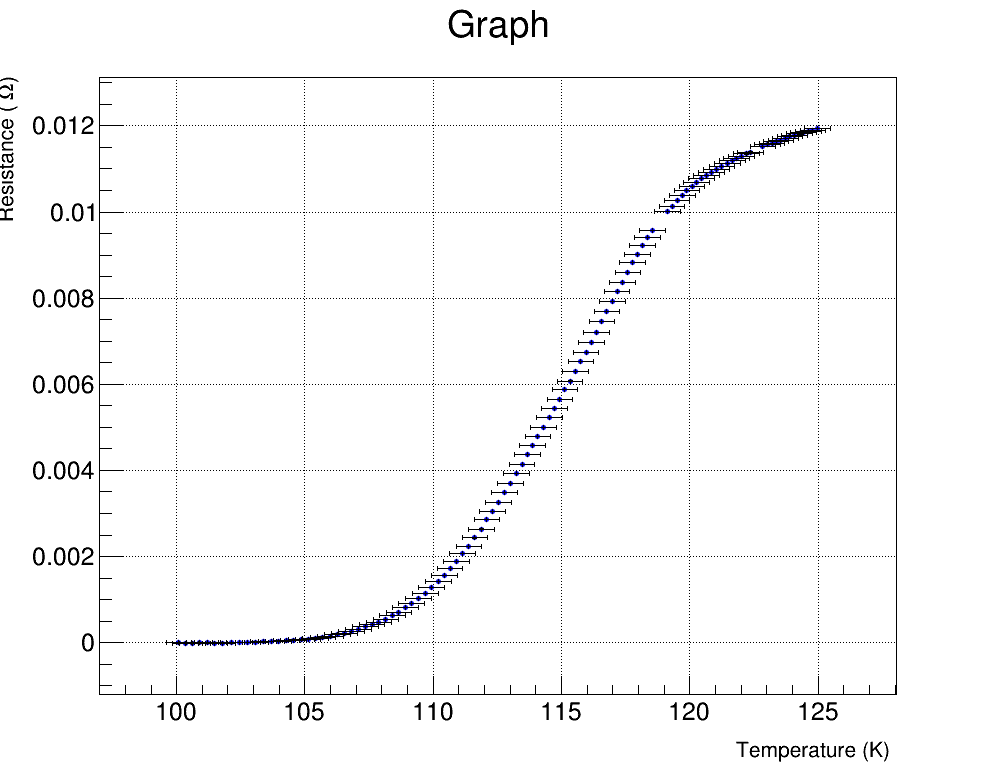

In [13]:
#Using ROOT.TGraphErrors(num_points, x_values, y_values, x_error, y_error)

graph = ROOT.TGraphErrors(len(temperature_filtered), temperature_filtered, resistance_filtered, temperature_error, resistance_error)

canvas = ROOT.TCanvas('canvas_name','Resistance vs Temperature', 1000, 800)

# Draw the graph with error bars
graph.Draw('AP')

graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)
graph.SetMarkerColor(ROOT.kBlue)

# Set axis labels
graph.GetXaxis().SetTitle('Temperature (K)')
graph.GetYaxis().SetTitle('Resistance (#Omega)')
graph.GetXaxis().SetTitleSize(0.03)
graph.GetYaxis().SetTitleSize(0.03)
graph.GetXaxis().SetTitleOffset(1.5)

canvas.SetGrid()

# Show the canvas
canvas.Draw()

## Fitting the curve

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      422.626
NDf                       =          104
Edm                       =  4.44757e-06
NCalls                    =           83
p0                        =    0.0120371   +/-   2.13769e-05 
p1                        =      115.265   +/-   0.0586005   
p2                        =     0.433128   +/-   0.0046565   


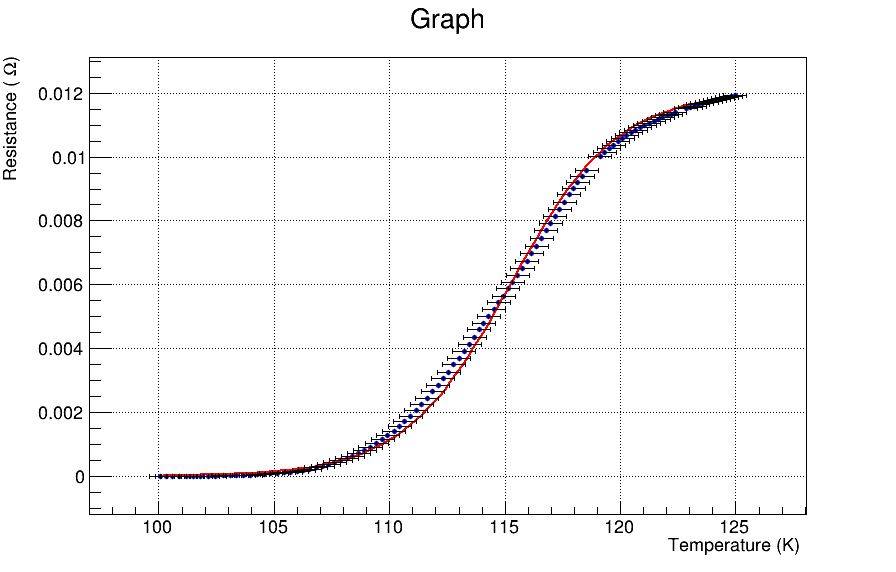

In [14]:
#sigmoid L / (1+exp(-k(x-x_0)))
#x = temperature
#p = [L,x_0,k]

#graph = ROOT.TGraph(len(data), temperature, resistance)
graph = ROOT.TGraphErrors(len(temperature_filtered), temperature_filtered, resistance_filtered, temperature_error, resistance_error)

def sigmoid(x,p):
    return p[0] / (1 + np.exp(-p[2]*(x[0] - p[1])))

sigmoid_func = ROOT.TF1("Sigmoid_fit", sigmoid, min_temp, max_temp, 3)
sigmoid_func.SetParameters(0.0120371, 114.265, 0.433127)

graph.Fit(sigmoid_func,"R")

canvas = ROOT.TCanvas('fitting','Resistance vs Temperature', 900, 600)

graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)
graph.SetMarkerColor(ROOT.kBlue)

# Set axis labels
graph.GetXaxis().SetTitle('Temperature (K)')
graph.GetYaxis().SetTitle('Resistance (#Omega)')
canvas.SetGrid()

# Show the canvas
graph.Draw("AP")
canvas.Draw()

## Critic Temperature

In [15]:
#Here the Tc corresponds to P[1]
tc = sigmoid_func.GetParameter(1)
tc_error = sigmoid_func.GetParError(1)
print("Tc =",tc,"K" "\nTc_error =",tc_error, "K")

Tc = 115.26493120369423 K
Tc_error = 0.05860053284021219 K


## Onset Temperature

In [16]:
onset_threshold = 0.01 * (max_resistance - min_resistance)  #1% threshold
onset_temperature = sigmoid_func.GetX(onset_threshold)
onset_temperature_error = sigmoid_func.GetParError(1)

print("TON = ", onset_temperature, "K" "\nTON_error = ", onset_temperature_error, "K")

TON =  104.63886861739324 K
TON_error =  0.05860053284021219 K


## Identifying the superconductor sample

References are shown in the presentation.

The most closest value of critic temperature correspond to the Bisco-2223, with a critic temperature of aproximately 110K. The onset temperature is close too.

In [17]:
#Error of the calculated critical temperature and the one found in the literature:
tc_lit = 110.0
Error = (np.abs(tc - tc_lit)/tc_lit) * 100
print("Error in Critical Temperature", Error, "%")

Error in Critical Temperature 4.7863010942674835 %


In [18]:
#Error of the calculated onset temperature and the one found in the literature:
Error2 = (np.abs(onset_temperature - tc_lit)/tc_lit) * 100
print("Error in Onset Temperature", Error2, "%")

Error in Onset Temperature 4.87375580236978 %


Both parameters are useful to identify the sample as Bisco-2223. Since YBCO superconductor has a critical temperature below 90K. The error is higher, as we can see:

In [19]:
tc_lit2 = 90.0
Error3 = (np.abs(tc - tc_lit2)/tc_lit2) * 100
print("Error in Critical Temperature", Error3, "%")

Error in Critical Temperature 28.07214578188248 %


In [20]:
#Error of the calculated onset temperature and the one found in the literature:
Error2 = (np.abs(onset_temperature - tc_lit2)/tc_lit2) * 100
print("Error in Onset Temperature", Error2, "%")

Error in Onset Temperature 16.26540957488138 %
